In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
store_data = pd.read_csv("/content/Stores.csv") #colab 저장소 경로에서 파일 가져와서 data라는 변수에 일단 저장하기
          # Store ID: (색인) 특정 상점의 ID
          # Store_Area: 상점의 물리적 영역(면적). 제곱 야드 단위
          # Items_Available: 해당 상점에서 살 수 있는 제품의 수
          # Daily: 한 달 동안 평균 매장을 방문한 고객 수
          # Store_Sales: 한 달 동안 매장에서 발생한 (US $) 매출
print(store_data)
  # 질문 만들기
  # 1) 상점 매출과 관련 있는 변수는 무엇일까?  - 가게 면적, 제품 수
  # 2) 방문 고객의 수가 늘어나면 상점의 매출로 오를까?   
  # 3) 방문 고객 수에 영향을 미치는 변수는 무엇일까? - 가게 면적, 제품 수, 가게 매출(입소문을 통해 가게의 인기가 기존 방문 고객의 증가로 이어질 수도 있지 않을까?)

     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
1            2        1461             1752                   210        39820
2            3        1340             1609                   720        54010
3            4        1451             1748                   620        53730
4            5        1770             2111                   450        46620
..         ...         ...              ...                   ...          ...
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1110        54340

[896 rows x 5 columns]


In [39]:
# 데이터 전처리 하기(nan 값 여부 확인.)
store_data.info()
print("\n")
store_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB




Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

Text(0.5, 1.0, 'Independent variables affecting Store_Sales')

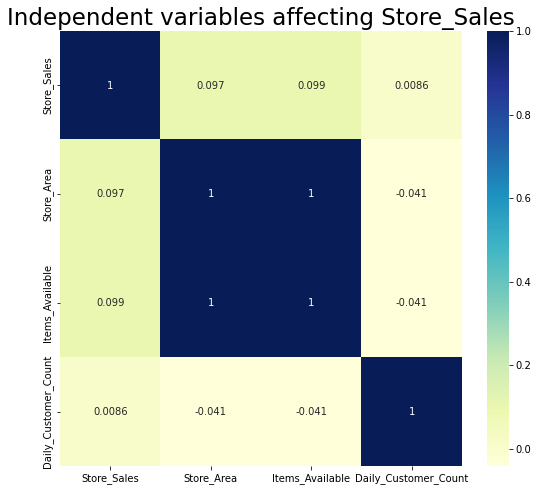

In [40]:
# 질문 토대로 분석해보기
# 1) 상점 매출과 관련 있는 변수는 무엇일까?  - 가게 면적, 제품 수

## 가게 매출 데이터를 매출, 가게 면적, 구매 가능한 제품 수, 월간 방문 고객 수들의 피벗 테이블로 변환(변수간의 최대 양의 상관 관계를 1, 최대 음의 상관 관계를 -1로 잡고, 
## 교차하는 지점에 상관관계 값을 표시)
store_correlation = store_data[['Store_Sales','Store_Area', 'Items_Available', 'Daily_Customer_Count']].corr()

## 상관 관계 테이블(피벗 테이블)을 히트맵 함수를 이용해 시각화
f1, ax1 = plt.subplots(1, 1, figsize=(9, 8))
sns.heatmap(data = store_correlation, annot=True, cmap='YlGnBu', ax=ax1)
plt.title("Independent variables affecting Store_Sales", size = 23)

### 분석 결과 -> 가게 면적은 가게 매출에 9.7%, 구매 가능한 제품 수는 가게 매출에 9.9% 영향을 미치므로 이들은 가게 매출에 영향을 미치는 유의미한 변수들이라고 보기 어려움. 


Text(0.5, 1.0, 'Correlation between customer_count and store sales')

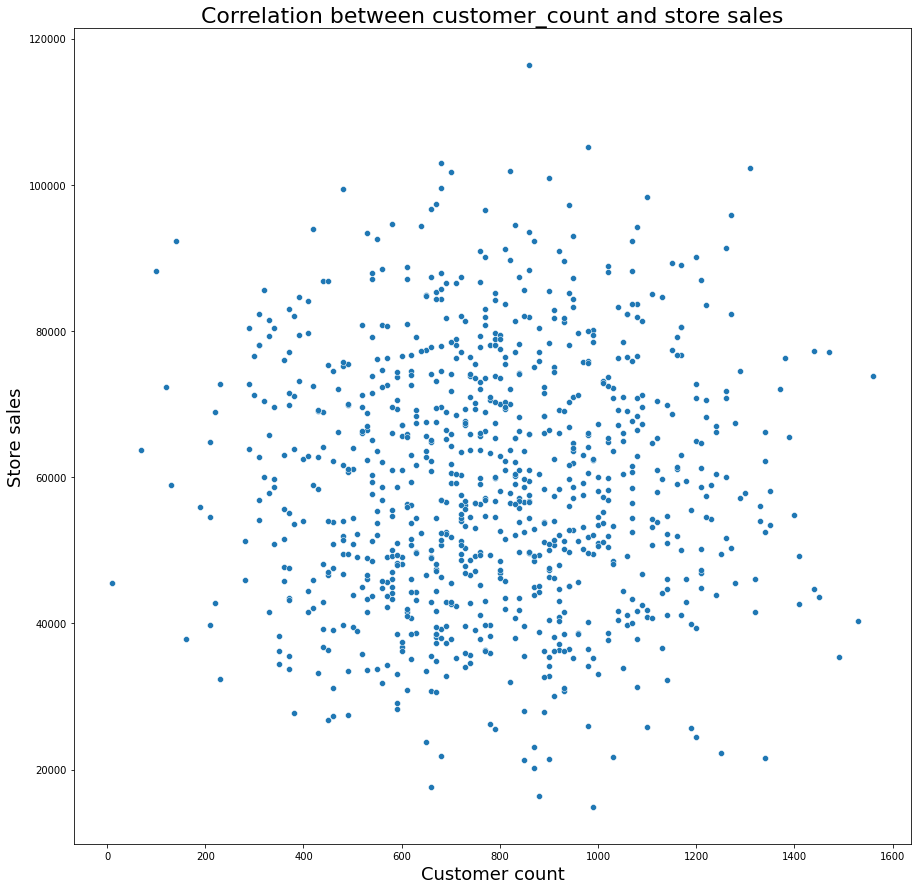

In [48]:
# 2) 방문 고객의 수가 늘어나면 상점의 매출로 오를까? 

## 월간 방문 고객 수와 그에 대응하는 가게 매출을 산점도로 표시하기
f2, ax2 = plt.subplots(1,1, figsize=(15, 15))
sns.scatterplot(data = store_data, x='Daily_Customer_Count', y='Store_Sales')
ax2.set_xlabel('Customer count', size=18)
ax2.set_ylabel('Store sales', size=18)
plt.title("Correlation between customer_count and store sales", size=22)

### -> 1번 질문에 대한 상관 관계 분석 결과, 예상과 달리 월간 방문 고객 수가 가게 매출에 미치는 정도가 0.86%에 불과해 가게 매출에 유의미한 영향을 미치는 변수가 아니었음. 
### -> 이를 scatter plot을 이용해 분포도를 그려보았더니 월간 방문 고객 수에 따른 가게 매출의 변화에 특정한 패턴이 있지 않음을 시각적으로 확인할 수 있었음. 
  
### 추가 질문) 방문 고객의 수와 별도로, 특히 더 많은 지출을 하는 고객들이 있다면 그 특징은 무엇일까? 
### (위 질문은 고객 별 월 평균 구매 금액과 고객 별 월 소득, 가게 별 판매 제품 종류, 주변 교통 시설 구비 여부(버스, 지하철로 접근이 용이한지 여부) 등의 데이터 추가적으로 필요.)
  
### 추가 질문 )평균 소득이 높은 지역의 상점은 방문 고객 수와는 별도로 매출이 더 높을 수 있지 않을까?(이 질문은 가게들의 지역 정보와 지역별 평균 소득 데이터가 추가적으로 필요.)




In [42]:
# 3) 방문 고객 수에 영향을 미치는 변수는 무엇일까? - 가게 면적, 제품 수, 가게 매출(입소문을 통해 가게의 인기가 기존 방문 고객의 증가로 이어질 수도 있지 않을까?)
## -> 1번 질문의 상관 관계 분석에서, 방문 고객 수에 대해 가게 면적은 -4.1%, 구매 가능한 제품 수는 -4.1%, 가게 매출은 0.86% 상관 관계를 가지고 있었음. 
## 즉, 이들은 방문 고객 수에 영향을 미치는 요인들이 아님.
  
## -> 방문 고객 수에 영향을 미치는 요인을 확인하기 위해서는 캠페인의 경우, 
## 할인 행사, 사은품 증정 등과 같은 캠페인을 진행한 주의 방문 고객 수, 매출 데이터를 확보하고, 
## 그 전 주와 다음 주, 그 전 달, 다음 달 데이터를 확보하여 캠페인 진행 기간과 매출 및 방문 고객 수를 비교해보는 것이 좋음(Cohort 분석 방법).
  
## -> 또한 인스타그램 등의 sns나 구글, 유튜브에 지역 광고를 올리고, 링크를 클릭한 고객에게 할인 쿠폰을 증정하되 표식이나 바코드 설정을 다르게 하여 
## 추후 방문한 고객이 어느 경로로 가게를 알게 되어 방문했는지를 확인할 수 있고, 어디에 광고하는 것이 효과적인지 판단할 수 있음. 
  
## -> 그외에도 팜플렛을 주변 동네에 배포하여 개인마다 10% 할인 쿠폰, 5천원 이하 제품 1+1 증정, 3만원 이상 구매 시 5천원 상당의 사은품 증정 등의 서로 다른 쿠폰을 나누어주고 
## 방문한 고객이 사용한 쿠폰에 따라 각 쿠폰의 효과를 비교하고, 효과가 좋은 쿠폰을 주기적으로 배포해 방문 고객의 증가를 유도할 수 있을 것.